# Demo of v2 Financial Payouts

https://docs.corp.stripe.com/payouts-beta

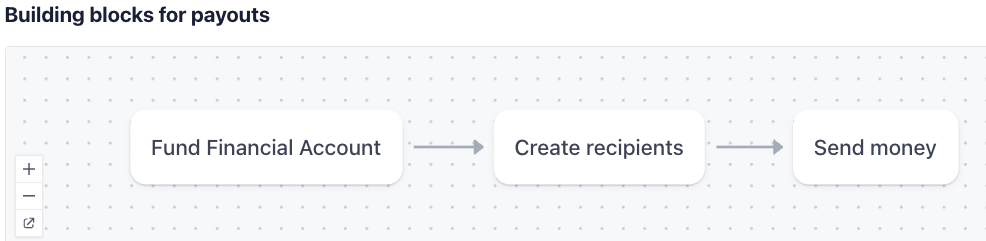

## Set up Recipient Accounts on Stripe INTERNAL
Set up a v2 Recipient account using gated feature

US Recipient Payouts - demo guide

Create a new test Stripe account by clicking on the “Create new account +” link

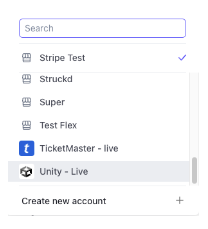

NOTE : Stripe accounts created via go/scenarios will not work for caribou recipient payouts demo
Navigate to Settings > Next Betas

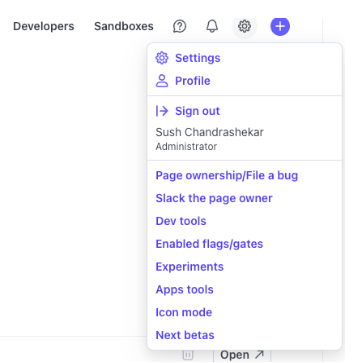

Click on the Caribou - Excelsior link 

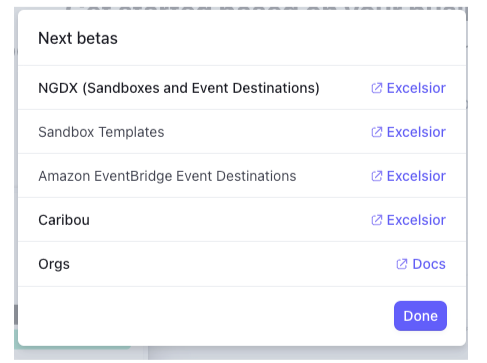

Run the excelsior - You need a specific permission to run the excelsior (fund_store_and_send_internal_test_account_bootstrapping_task_run). You can
Raise an LDAP request for the permission
Once you have the permission, run the excelsior.
OR
All SAs on the DNB have this access, one of us can run this for you.

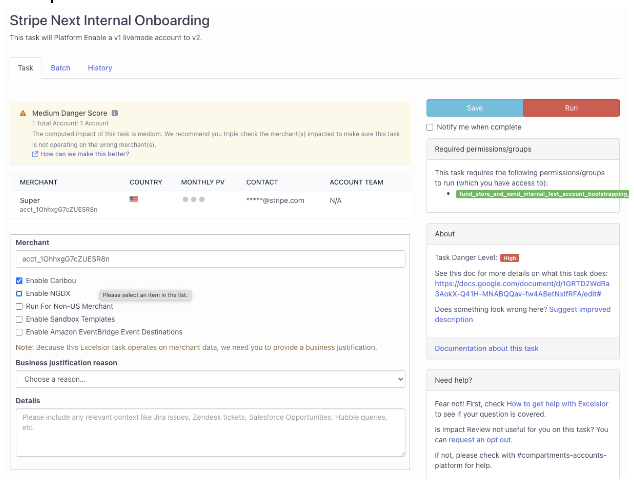    	

Once the Excelsior is successfully ran, Payouts beta will be enabled on the Stripe account

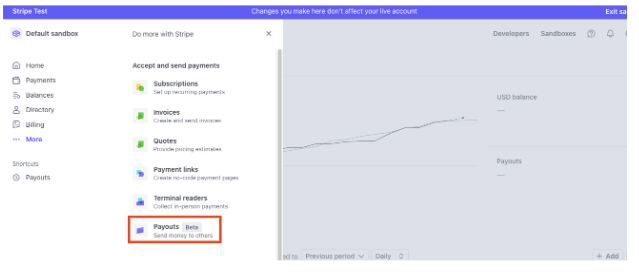

Clicking on “Payouts” will take you to the payouts list page. For testing purposes $10,000 is automatically loaded to the Recipients payouts balance.

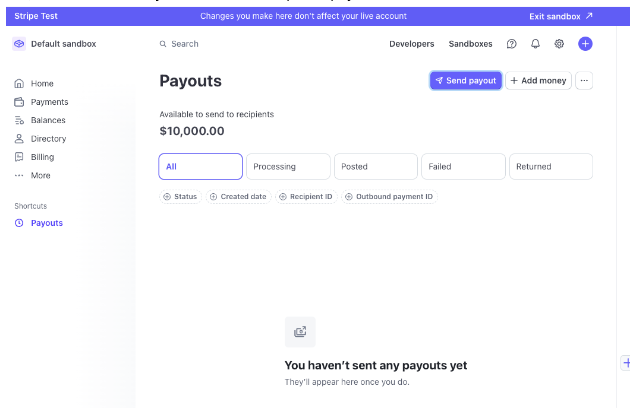

## Testing via APIS

Claim workflow using Financial payouts v2 using https://docs.corp.stripe.com/payouts-beta

Testing Via APIs
For testing V2 Caribou Recipient Payouts APIs, you will need to use Stripe CLI Preview Plugin 
You can find the documentation on how to enable it here 
https://docs.corp.stripe.com/cli-preview-plugin 
Once the Preview plugin is enabled, you are good to start testing the APIs.
Please keep in mind, dashboard workbench shell does not have great support for V2 yet.

Create V2 API key
https://docs.corp.stripe.com/payouts-beta/quickstart?dashboard-or-api=api#create-api-key 
Need to use a separate v2key for now

Account: Collinson Insurance PayoutsUS https://dashboard.stripe.com/?acct_1P97JaGgZSktx17Q
Id: acct_1P97JaGgZSktx17Q

Sandbox Parent: https://dashboard.stripe.com/?acct_1P8LNSGS0GsRpyPJ

## Need v2 sdk to use API


See https://docs.corp.stripe.com/sdks-v2
Need to get access to Stripe repo to download client once PAT onGH is added

see SDK docs at: https://docs.corp.stripe.com/api/v2?lang=python

see Releases at : https://github.com/stripe/stripe-python-next/releases

ENSURE USING LATEST PYTHON VERSION

To install the sdk python 

```bash
PAT Token : ghp_***
pip3 install git+https://ghp_**@github.com/stripe/stripe-python-next.git@v0.12.0
pip3 install stripe==0.12.0

// In requirements.txt
stripe==0.12.0

```

Add to releases file 


## v2 SDK Docs
https://docs.corp.stripe.com/payouts-beta






### Check account access and connectivity using the apikey provided
Ensure using .env file to access the v2 apikey
Add the following entries to your .env file

STRIPE_ACCOUNT_ID=acct_xxx

V2_STRIPE_API_KEY=key_test_xxx

In [2]:
import stripe 
import pandas as pd
from pandas import json_normalize
import requests
import json
import os
from dotenv import load_dotenv

# Load environment variables from .env file - note if you change env file then 
# need to restart kernel and refresh as values are cached
load_dotenv()


# Access environment variables
V2_STRIPE_API_KEY = os.getenv("V2_STRIPE_API_KEY")
STRIPE_ACCOUNT_ID = os.getenv("STRIPE_ACCOUNT_ID")

# Collinson Insurance PayoutsUS - put into .env later
stripe.api_key = V2_STRIPE_API_KEY
client = stripe.StripeClient(stripe.api_key)


stripe.Account.retrieve(STRIPE_ACCOUNT_ID)
df_acct = pd.DataFrame(stripe.Account.retrieve(STRIPE_ACCOUNT_ID))
df_acct


/var/folders/9m/t72656356dq0xv4flxmxncfr0000gn/T/ipykernel_51606/3724652768.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,object,business_profile,capabilities,charges_enabled,controller,country,default_currency,details_submitted,email,payouts_enabled,settings,type
annual_revenue,acct_1P97JaGgZSktx17Q,account,None,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
estimated_worker_count,acct_1P97JaGgZSktx17Q,account,None,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
mcc,acct_1P97JaGgZSktx17Q,account,5734,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
name,acct_1P97JaGgZSktx17Q,account,Llama Insurance,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
support_address,acct_1P97JaGgZSktx17Q,account,"{'city': 'San Francisco', 'country': 'US', 'li...",NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
support_email,acct_1P97JaGgZSktx17Q,account,None,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
support_phone,acct_1P97JaGgZSktx17Q,account,+14155550199,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
support_url,acct_1P97JaGgZSktx17Q,account,None,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
url,acct_1P97JaGgZSktx17Q,account,https://accessible.stripe.com,NaN,True,NaN,US,usd,True,rajan+test01@stripe.com,True,NaN,standard
type,acct_1P97JaGgZSktx17Q,account,NaN,NaN,True,account,US,usd,True,rajan+test01@stripe.com,True,NaN,standard


# Useful helper functions
Some python helper functions to create dataframes from lists and strings

In [3]:
def json_to_flat_df(json_data, verbose=True):
    """
    Flatten a JSON object and convert lists and dictionaries to strings.
    
    Parameters:
    - json_data: A JSON-like dictionary to be converted into a pandas DataFrame.
    
    Returns:
    - A pandas DataFrame with the JSON data flattened.
    """

    if(verbose): 
        print(json_data)
    
    # Flatten the entire JSON object
    df = json_normalize(json_data)
    
    # Check each column to see if it contains dictionaries or lists
    for column in df.columns:
        if isinstance(df.at[0, column], dict) or isinstance(df.at[0, column], list):
            # Convert dictionaries and lists to their string representation
            df[column] = df[column].apply(lambda x: str(x))
    
    return df


def list_to_dataframe(list):
    """
    Converts financial accounts data to a pandas DataFrame.
    
    Parameters:
    - financial_accounts: The financial accounts data in a format that needs conversion.
    
    Returns:
    - A pandas DataFrame generated from the financial accounts data.
    """
    # Assuming financial_accounts needs proper handling to get its JSON string representation
    # This part heavily depends on the structure of financial_accounts and how it should be converted
    
    # Safely attempt to convert financial_accounts to the correct JSON string format
    try:
        # Placeholder for the correct conversion to a JSON string
        # This line needs to be adjusted based on the actual format/methods of financial_accounts
        json_string = str(list) # This method is hypothetical
    except AttributeError:
        # Fallback if the specified method fails or doesn't exist
        raise ValueError("Unable to convert 'list' to a JSON string.")
    
    # Now decode the JSON string into a Python dictionary
    data_dict = json.loads(json_string)
    
    # Normalize the 'data' part of the dictionary to create a DataFrame
    data_df = pd.json_normalize(data_dict, 'data')
    
    return data_df

def get_financial_account_balance(client, financial_accounts_id, verbose=True):
    """
    Retrieve and print financial account balance.

    Parameters:
    - client: StripeClient object to communicate with Stripe API
    - financial_accounts_id: The ID of the financial account
    
    Returns:
    - DataFrame containing the balance amount
    """
    print("financial_accounts_id: " + financial_accounts_id)
    
    responses = client.v2.financial_accounts.balances.list(financial_accounts_id)
    if(verbose) : 
        print(responses)
    
    # Extract the 'data' part for the DataFrame
    data = responses['data']
    df = json_to_flat_df(data, verbose)
    
    # Ensure 'cash.usd.value' is a valid key in the DataFrame
    if 'cash.usd.value' in df.columns:
        balance_amount = df['cash.usd.value'].iloc[0]
        print("balance_amount : usd: " + str(balance_amount))
    else:
        print("The key 'cash.usd.value' is not in the DataFrame.")
    
    return df

# Usage example - you must have the 'client' and 'financial_accounts_id' variables defined
# financial_accounts_id = 'your_financial_account_id_here'
# df_balance = get_financial_account_balance(client, financial_accounts_id)



def get_financial_account_transactions(client, verbose=True):
    """
    Fetches all financial account transactions from the client, 
    converts them to a DataFrame and returns the DataFrame.

    Parameters:
    - client: The client instance to make the API request.

    Returns:
    - DataFrame containing financial account transactions.
    """
    responses = client.v2.transactions.list()

    if(verbose): 
        print(responses)
        
    # Assuming the 'responses' object can be directly converted to a string that represents JSON.
    # If this is not the case, you might need to adjust the handling here, 
    # for example, by using a method provided by the 'responses' object to get the JSON representation.
    
    try:
        # Attempting direct conversion of responses to JSON string might not work as expected,
        # especially if 'responses' doesn't directly convert to a valid JSON format string. 
        # This approach assumes it does, but consider modifying this part as per your client library's structure.
        json_string = str(responses)
        data_dict = json.loads(json_string)
    except TypeError as e:
        # If conversion fails, print the error and return an empty DataFrame
        print(f"Error converting responses to JSON: {e}")
        return pd.DataFrame()
    
    # Normalize the 'data' key from the dictionary to a DataFrame
    data_df = pd.json_normalize(data_dict, 'data')
    return data_df

# Usage example:
# client = YourClientHere  # Make sure to instantiate your client
# transactions_df = get_financial_account_transactions(client)
# print(transactions_df)


# Fund the Financial Account ID
Add funds to the financial account balance before using it this adds to a separate balance in Stripe 
different from the payments-in balance


## Show the financial address data 
A FinancialAddress contains information needed to transfer money to a balance in a Financial Account. A Financial Account can have more than one Financial Address.
see https://docs.corp.stripe.com/api/v2/financial-addresses


In [19]:
# Fund the Financial Account ID in the following step, "View FinancialAccount balance"
financial_addresses = client.v2.financial_addresses.list()
print(financial_addresses)

data = financial_addresses['data']
df = json_to_flat_df(
    data)
financial_adddress_id = str(df['id'].iloc[0])
print("id:" + financial_adddress_id)

df

{
  "data": [
    {
      "balance_type": "storage",
      "created": "2024-04-24T15:01:49.771Z",
      "credentials": {
        "type": "us_bank_account",
        "us_bank_account": {
          "account_number": null,
          "bank_name": "Test Bank",
          "last4": "6297",
          "routing_number": "110000000",
          "swift_code": "TSTEZ122"
        }
      },
      "currency": "usd",
      "financial_account": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA",
      "id": "finaddr_test_61QIVHpYqfRngroww16QIVGwAoSQ2sHaBpO6gZFTU3cW",
      "object": "financial_address",
      "status": "active"
    }
  ],
  "last_request": [
    "/v2/financial_addresses",
    {}
  ],
  "next_page": null,
  "previous_page": null
}
[<FinancialAddress financial_address id=finaddr_test_61QIVHpYqfRngroww16QIVGwAoSQ2sHaBpO6gZFTU3cW at 0x117e4f590> JSON: {
  "balance_type": "storage",
  "created": "2024-04-24T15:01:49.771Z",
  "credentials": {
    "type": "us_bank_account",
    "us_bank_ac

,id,object,balance_type,created,currency,financial_account,status,credentials.type,credentials.us_bank_account.account_number,credentials.us_bank_account.bank_name,credentials.us_bank_account.last4,credentials.us_bank_account.routing_number,credentials.us_bank_account.swift_code
0,finaddr_test_61QIVHpYqfRngroww16QIVGwAoSQ2sHaB...,financial_address,storage,2024-04-24T15:01:49.771Z,usd,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,active,us_bank_account,None,Test Bank,6297,110000000,TSTEZ122


## Show the financial account data 
Financial Accounts act as the container for configuration for your money movement. Financial Accounts also contain Balances which store your funds.
see https://docs.corp.stripe.com/api/v2/financial-accounts


In [20]:
# Show the financial account
financial_accounts = client.v2.financial_accounts.list()
print(financial_accounts)

data = financial_accounts['data']
df = json_to_flat_df(data)
financial_accounts_id = str(df['id'].iloc[0])
print("financial_accounts_id:" + financial_accounts_id)

df

{
  "data": [
    {
      "balance_types": [
        "storage"
      ],
      "country": "US",
      "created": "2024-04-24T15:01:29.302Z",
      "description": "",
      "id": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA",
      "object": "financial_account",
      "requested_currencies": [
        "usd"
      ],
      "status": "open"
    }
  ],
  "last_request": [
    "/v2/financial_accounts",
    {}
  ],
  "next_page": null,
  "previous_page": null
}
[<FinancialAccount financial_account id=fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA at 0x120000950> JSON: {
  "balance_types": [
    "storage"
  ],
  "country": "US",
  "created": "2024-04-24T15:01:29.302Z",
  "description": "",
  "id": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA",
  "object": "financial_account",
  "requested_currencies": [
    "usd"
  ],
  "status": "open"
}]
financial_accounts_id:fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA


,id,object,balance_types,country,created,description,requested_currencies,status
0,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,financial_account,['storage'],US,2024-04-24T15:01:29.302Z,,['usd'],open


## Fund the Financial Address

Use the id: financial_adddress_id : finaddr_......


In [7]:
# Fund the Financial Account ID in the following step, "View FinancialAccount balance"

print("id:" + financial_adddress_id)

response = client.v2.test_helpers.financial_addresses.credit(
  financial_adddress_id,
  {
    'amount': {
      'value': 1000,
      'currency': 'usd', # Only USD supported
    },
    'network': 'ach',
  },
)
print(response)
df = json_to_flat_df(response)
df



id:finaddr_test_61QIVHpYqfRngroww16QIVGwAoSQ2sHaBpO6gZFTU3cW
{
  "object": "financial_address_credit_simulation",
  "status": "accepted"
}
{
  "object": "financial_address_credit_simulation",
  "status": "accepted"
}


,object,status
0,financial_address_credit_simulation,accepted


# Show the financial account balance

using the financial account id : fa_.....
https://docs.corp.stripe.com/api/v2/financial-accounts/list 


In [21]:
# View the FinancialAccount balance
# Use the /v2/financial_account/{{FINANCIAL_ACCOUNT_ID}}/balances endpoint to view the 
# balances held in the FinancialAccount. List the FinancialAccounts to receive the identifier:

# financial_accounts = client.v2.financial_accounts.list()
# id = financial_accounts.data[0].id

print("financial_accounts_id:" + financial_accounts_id)
responses = client.v2.financial_accounts.balances.list(financial_accounts_id)
print(responses)


# We are interested in the 'data' part for the DataFrame
data = responses['data']
df = json_to_flat_df(data)
balance_amount = df['cash.usd.value'].iloc[0]
print("balance_amount - usd:" + str(balance_amount))

df


financial_accounts_id:fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
{
  "data": [
    {
      "cash": {
        "usd": {
          "currency": "usd",
          "value": 1465703
        }
      },
      "created": "2024-04-24T15:01:29.357Z",
      "inbound_pending": {
        "usd": {
          "currency": "usd",
          "value": 0
        }
      },
      "object": "financial_account.balance",
      "outbound_pending": {
        "usd": {
          "currency": "usd",
          "value": 0
        }
      },
      "supported_currencies": [
        "usd"
      ],
      "type": "storage"
    }
  ],
  "last_request": [
    "/v2/financial_accounts/fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA/balances",
    {}
  ],
  "next_page": null,
  "previous_page": null
}
[<FinancialAccountBalance financial_account.balance at 0x1209ead50> JSON: {
  "cash": {
    "usd": {
      "currency": "usd",
      "value": 1465703
    }
  },
  "created": "2024-04-24T15:01:29.357Z",
  "inbound_pen

,object,created,supported_currencies,type,cash.usd.value,cash.usd.currency,inbound_pending.usd.value,inbound_pending.usd.currency,outbound_pending.usd.value,outbound_pending.usd.currency
0,financial_account.balance,2024-04-24T15:01:29.357Z,['usd'],storage,1465703,usd,0,usd,0,usd


# Create a recipient 
https://docs.corp.stripe.com/payouts-beta/create-and-update-recipients
Before you can send a payment, you must first set up an Account to represent the business or individual that receives the funds.

To set up an Account for your recipient and configure it to receive payments, you must:

Create an Account with a default contact email for the recipient
Configure the RecipientConfiguration for the account and request Features that indicate how you send money to the Account
Provide any Legal Entity information required by Stripe to activate the requested Features

In [10]:
# Create a recipient

# Use the /v2/accounts API to create an Account. 
# The following example configures the account as a recipient, 
# which enables the Account to receive payments from you:

response = client.v2.accounts.create(
  {
    'name': 'Homers Donuts Company account',
    'email': 'homeer.donuts@example.com',
    'include': [ 'legal_entity_data', 'configuration.recipient_data'],
    'legal_entity_data': {
      'business_type': 'company',
      'country': 'us',
      'name': 'Homers Donuts',
    },
    'configuration': {
      'recipient_data': {
        'features': {
          'bank_accounts': {'local': {'requested': True}},
        },
      },
    },
  },
)
print(response)



{
  "applied_configurations": [
    "recipient"
  ],
  "configuration": {
    "recipient_data": {
      "default_outbound_destination": null,
      "features": {
        "bank_accounts": {
          "local": {
            "requested": true,
            "status": "active",
            "status_details": []
          }
        }
      }
    }
  },
  "created": "2024-05-08T11:40:31.755Z",
  "email": "homeer.donuts@example.com",
  "id": "acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe",
  "legal_entity_data": {
    "business_type": "company",
    "country": "US",
    "name": "Homers Donuts",
    "representative": null
  },
  "name": "Homers Donuts Company account",
  "object": "account"
}


In [13]:

# Get the recipient id just created to allow payouts later on 
data = response
df = json_to_flat_df(data)
df

recipient_id = df['id'].iloc[0]
print(recipient_id)

print ("https://dashboard.stripe.com/test/directory/recipients/" + str(recipient_id))

{
  "applied_configurations": [
    "recipient"
  ],
  "configuration": {
    "recipient_data": {
      "default_outbound_destination": null,
      "features": {
        "bank_accounts": {
          "local": {
            "requested": true,
            "status": "active",
            "status_details": []
          }
        }
      }
    }
  },
  "created": "2024-05-08T11:40:31.755Z",
  "email": "homeer.donuts@example.com",
  "id": "acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe",
  "legal_entity_data": {
    "business_type": "company",
    "country": "US",
    "name": "Homers Donuts",
    "representative": null
  },
  "name": "Homers Donuts Company account",
  "object": "account"
}
acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe
https://dashboard.stripe.com/test/directory/recipients/acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe


# Create hosted onboarding link to take bank account details for the recipient just created
Using https://docs.corp.stripe.com/payouts-beta/create-and-update-recipients?dashboard-or-api=api#onboard-recipients-via-the-account-link-api

**Note: python sdk not working so need to use rest api directly - have asked on slack channel to investigate**

In [4]:
# Create an AccountLink object
# Creates an AccountLink object that includes a single-use Stripe URL that the merchant can redirect their user to 
# in order to take them to a Stripe-hosted application such as Recipient Onboarding.
# see https://docs.corp.stripe.com/payouts-beta/create-and-update-recipients?dashboard-or-api=api#onboard-recipients-via-the-account-link-api
recipient_id = 'acct_test_61Qecn2CUyLa55hoy66Qecn2AoSQHVmD38rii9HVAByS'
print ("Using recipient_id:" + recipient_id)

response = client.v2.account_links.create({
  "account": recipient_id,
  "use_case": {
    "type": "account_onboarding",
    "account_onboarding": {
      "configurations": ["recipient"],
      "refresh_url": "https://www.example.com",
      "return_url": "https://www.example.com",
    },
  },
})

data = response
df = json_to_flat_df(data)
df




Using recipient_id:acct_test_61Qecn2CUyLa55hoy66Qecn2AoSQHVmD38rii9HVAByS
{
  "account": "acct_test_61Qecn2CUyLa55hoy66Qecn2AoSQHVmD38rii9HVAByS",
  "created": "2024-06-24T16:55:57.710Z",
  "expires_at": "2024-07-01T16:55:57.710Z",
  "object": "account_link",
  "url": "https://accounts.stripe.com/r/acct_test_61Qecn2CUyLa55hoy66Qecn2AoSQHVmD38rii9HVAByS#d2tzcF90ZXN0XzZRSVZHd0FvU1Eyc0hhQnBPNmdaRlRVX19rZXlfdGVzdF8wYnUxbUIzZkYzVHBnMlRkMjY5VEllUnk5N2VjR3kydEQxa003b0NjY3MxY2syT3Uwems4QWVnQ2kzbDgzUGQ2S1Q3R3g3cTY2bTg2S1Q3S3YzQkw1cTU2Slc3NFg1R0I0dTIzR2U3NXM1MHQzQ2g0U080TDU0bWI1eTEzbWo0T1I0cWs1aDQ2U0s0R281RzkzeEUyUUszUFAyY0xkeG1jbm05R3RicDQxNTgwVU0wTHhhcUIzczgwSDE0elAyTVRmYko3RHVhWXM0VTEzMjUzWUM0NFA3UzljaXJlaksxeG5mVWhmdDE1RWthekg5Q0ozUno=",
  "use_case": {
    "account_onboarding": {
      "configurations": [
        "recipient"
      ],
      "refresh_url": "https://www.example.com",
      "return_url": "https://www.example.com"
    },
    "type": "account_onboarding"
  }
}


,object,account,created,expires_at,url,use_case.account_onboarding.configurations,use_case.account_onboarding.refresh_url,use_case.account_onboarding.return_url,use_case.type
0,account_link,acct_test_61Qecn2CUyLa55hoy66Qecn2AoSQHVmD38ri...,2024-06-24T16:55:57.710Z,2024-07-01T16:55:57.710Z,https://accounts.stripe.com/r/acct_test_61Qecn...,['recipient'],https://www.example.com,https://www.example.com,account_onboarding


## SDK for Hosted Onboard Recipient Not Working - Use REST API Directly
v2 SDK create bank account not working see above so use rest api direftly for now to get hosted onboarding link to take bank accoutn details

In [17]:
# Using rest api  instead as it might work to onboard an account with hosted onboarding
print ("Create hosted receipient on-board for bank account recipient_id:" + recipient_id)

headers = {
    'Authorization': f'Bearer {STRIPE_API_KEY}',
    'Stripe-Version': '2024-04-11.preview-v2',
    'Content-Type': 'application/json',  # Ensures the server treats our request body as JSON
}

# Define the Payload
payload = {
    "account": recipient_id,
    "use_case": {
        "type": "account_onboarding",
        "account_onboarding": {
            "configurations": [
                "recipient"
            ],
            "refresh_url": "https://www.example.com",
            "return_url": "https://www.example.com"
        }
    }
}

# Define the URL
url = "https://api.stripe.com/v2/account_links"

# Make a POST request
response = requests.post(url, headers=headers, data=json.dumps(payload))
print(response.json)


Create hosted receipient on-board for bank account recipient_id:acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe
<bound method Response.json of <Response [200]>>


In [18]:

# Check if the request was successful
print(response.json)
if response.status_code == 200:
    # Parse the response JSON and print it
    response_data = response.json()
    print(json.dumps(response_data, indent=4))
else:
    # Print the error
    print(f"Failed to make request. Status code: {response.status_code}, Response: {response.text}")


<bound method Response.json of <Response [200]>>
{
    "account": "acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe",
    "created": "2024-05-08T11:51:56.000Z",
    "expires_at": "2024-05-15T11:51:56.000Z",
    "url": "https://accounts.stripe.com/r/acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe#d2tzcF90ZXN0XzZRSVZHd0FvU1Eyc0hhQnBPNmdaRlRVX19rZXlfdGVzdF8wYVBjbGpjRlFmVWw2ZDhkc2pjQzQ2MDI0TWZmanA0aDFmckc4ZXhmNDAxY2syT3UwQUU4WVZlWVQzaDAzUGQ2S1Q3R3g3cTY2bTg2S1Q3S3YzQkw1cEk1UGM3OFM2R2w1V1I3V1g2R003NHQzQ2g0U080TDU0bWI1eTEzbWo0T1I0cWs1aDQ2U0s0R281RzI3Y0tmYTY1ZkUwY2lneHA4TnA3NzQ1QzdhNEM3ejNnZ3k2M05mM3hnSHgxS2szU2dlNGk5UEdhQ3pmZFpndHNmeTM4Q0QwTUw2R0JiRXhhTlI1T1FmWEVlMWtmVnkyMlpkZlQ=",
    "use_case": {
        "account_onboarding": {
            "configurations": [
                "recipient"
            ],
            "refresh_url": "https://www.example.com",
            "return_url": "https://www.example.com"
        },
        "type": "account_onboarding"
    }
}


## Collect the recipients bank details directly if not using hosted bank account onboarding
 https://docs.corp.stripe.com/api/v2/us-bank-accounts

 https://docs.corp.stripe.com/payouts-beta/create-and-update-recipients?dashboard-or-api=api#collect-payment-details

In [52]:
# Use the /v2/payment_methods/us_bank_accounts API to collect the recipient’s bank account details. 
# Pass in the recipient’s account ID from the previous step in the Stripe-Context header to indicate that 
# the resource belongs to the recipient account. The following example uses test values for routing and account numbers:

# USe API to collect payment details
# https://docs.corp.stripe.com/api/v2/us-bank-accounts

response = client.v2.payment_methods.us_bank_accounts.create(
  {
    "routing_number": "110000000",
    "account_number": "000123456789",
    "bank_account_type": "checking", 
  },
  {"stripe_context":recipient_id},
)

data = response
df = json_to_flat_df(data)
df


{
  "archived": false,
  "bank_account_type": "checking",
  "bank_name": "Test Bank",
  "created": "2024-05-08T12:38:51.883Z",
  "id": "usba_test_61QNXj9G2GnREZ5cL16QNWohAoSQpQGsTaB3WT6TY3Gq",
  "last4": "6789",
  "object": "payment_methods.us_bank_account",
  "routing_number": "110000000"
}


,id,object,archived,bank_account_type,bank_name,created,last4,routing_number
0,usba_test_61QNXj9G2GnREZ5cL16QNWohAoSQpQGsTaB3...,payment_methods.us_bank_account,False,checking,Test Bank,2024-05-08T12:38:51.883Z,6789,110000000


## Show attached Bank accounts for the Recipient

see https://docs.corp.stripe.com/api/v2/payment-methods/list 


In [24]:
# Check the bank account details have been added
recipient_id = 'acct_test_61QcRZb0M748duzvd66QcRZbAoSQKAvnPWObq5KUC2AK'
print(recipient_id)
print ("https://dashboard.stripe.com/test/directory/recipients/" + str(recipient_id))

# List all OutboundDestination objects
# List objects that can be used as destinations for outbound money movement via OutboundPayment.
# Use the recipients id to get the destination bank accounts

data = client.v2.payment_methods.outbound_destinations.list(
  options={"stripe_context": recipient_id},
)

print(data)
json_string = str(data)
# Now decode the JSON string into a Python dictionary
data_dict = json.loads(json_string)
data_df = pd.json_normalize(data_dict, 'data')

# Take a look at the DataFrame
data_df


acct_test_61QcRZb0M748duzvd66QcRZbAoSQKAvnPWObq5KUC2AK
https://dashboard.stripe.com/test/directory/recipients/acct_test_61QcRZb0M748duzvd66QcRZbAoSQKAvnPWObq5KUC2AK
{
  "data": [
    {
      "bank_account": {
        "archived": false,
        "bank_name": "Test Bank",
        "country": "US",
        "enabled_methods": [
          "local"
        ],
        "last4": "6789",
        "supported_currencies": [
          "usd"
        ],
        "type": "payment_methods.us_bank_account"
      },
      "created": "2024-06-18T15:07:06.220Z",
      "id": "usba_test_61QcRa6NPwmNxlcJm16QcRZbAoSQKAvnPWObq5KUC4AS",
      "object": "payment_methods.outbound_destination",
      "type": "bank_account"
    }
  ],
  "last_request": [
    "/v2/payment_methods/outbound_destinations",
    {}
  ],
  "next_page": null,
  "previous_page": null
}


,created,id,object,type,bank_account.archived,bank_account.bank_name,bank_account.country,bank_account.enabled_methods,bank_account.last4,bank_account.supported_currencies,bank_account.type
0,2024-06-18T15:07:06.220Z,usba_test_61QcRa6NPwmNxlcJm16QcRZbAoSQKAvnPWOb...,payment_methods.outbound_destination,bank_account,False,Test Bank,US,[local],6789,[usd],payment_methods.us_bank_account


# Perform a Recipient Payout 

## List the Financial account to get the Source of Funds
https://docs.corp.stripe.com/api/v2/financial-accounts/list

In [57]:
# List the Financial account to get the account id
# https://docs.corp.stripe.com/api/v2/financial-accounts/list

financial_accounts = client.v2.financial_accounts.list()
print(financial_accounts)

json_string = str(financial_accounts)
# Now decode the JSON string into a Python dictionary
data_dict = json.loads(json_string)
data_df = pd.json_normalize(data_dict, 'data')

financial_accounts_id = str(data_df['id'].iloc[0])
print("financial_accounts_id:" + financial_accounts_id)

data_df


{
  "data": [
    {
      "balance_types": [
        "storage"
      ],
      "country": "US",
      "created": "2024-04-24T15:01:29.302Z",
      "description": "",
      "id": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA",
      "object": "financial_account",
      "requested_currencies": [
        "usd"
      ],
      "status": "open"
    }
  ],
  "last_request": [
    "/v2/financial_accounts",
    {}
  ],
  "next_page": null,
  "previous_page": null
}
financial_accounts_id:fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
financial_accounts_id: fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
{
  "data": [
    {
      "cash": {
        "usd": {
          "currency": "usd",
          "value": 1527002
        }
      },
      "created": "2024-04-24T15:01:29.357Z",
      "inbound_pending": {
        "usd": {
          "currency": "usd",
          "value": 0
        }
      },
      "object": "financial_account.balance",
      "outbound_pending": {
        "usd": {

,object,created,supported_currencies,type,cash.usd.value,cash.usd.currency,inbound_pending.usd.value,inbound_pending.usd.currency,outbound_pending.usd.value,outbound_pending.usd.currency
0,financial_account.balance,2024-04-24T15:01:29.357Z,['usd'],storage,1527002,usd,0,usd,0,usd


In [81]:
# Get the current balance
get_financial_account_balance(client, financial_accounts_id, True)

financial_accounts_id: fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
{
  "data": [
    {
      "cash": {
        "usd": {
          "currency": "usd",
          "value": 1527002
        }
      },
      "created": "2024-04-24T15:01:29.357Z",
      "inbound_pending": {
        "usd": {
          "currency": "usd",
          "value": 0
        }
      },
      "object": "financial_account.balance",
      "outbound_pending": {
        "usd": {
          "currency": "usd",
          "value": 0
        }
      },
      "supported_currencies": [
        "usd"
      ],
      "type": "storage"
    }
  ],
  "last_request": [
    "/v2/financial_accounts/fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA/balances",
    {}
  ],
  "next_page": null,
  "previous_page": null
}
{
  "archived": false,
  "bank_account_type": "checking",
  "bank_name": "Test Bank",
  "created": "2024-05-08T12:38:51.883Z",
  "id": "usba_test_61QNXj9G2GnREZ5cL16QNWohAoSQpQGsTaB3WT6TY3Gq",
  "last4": "6789",
  

,object,created,supported_currencies,type,cash.usd.value,cash.usd.currency,inbound_pending.usd.value,inbound_pending.usd.currency,outbound_pending.usd.value,outbound_pending.usd.currency
0,financial_account.balance,2024-04-24T15:01:29.357Z,['usd'],storage,1527002,usd,0,usd,0,usd


## List all the destination bank accounts for a recipients
Using https://docs.corp.stripe.com/api/v2/payment-methods/list
List objects that can be used as destinations for outbound money movement via OutboundPayment.


In [30]:
# List all OutboundDestination objects
# List objects that can be used as destinations for outbound money movement via OutboundPayment.
# Use the recipients id to get the destination bank accounts
# Check the bank account details have been added
recipient_id = 'acct_test_61QcTUz4Btjtsf8bS66QcTUzAoSQpitDehvYrZ78SMYy'

print("recipient_id:" + recipient_id)

data = client.v2.payment_methods.outbound_destinations.list(
  options={"stripe_context": recipient_id},
)
print(data)
json_string = str(data)
# Now decode the JSON string into a Python dictionary
data_dict = json.loads(json_string)
data_df = pd.json_normalize(data_dict, 'data')

# Take a look at the DataFrame
data_df



recipient_id:acct_test_61QcTUz4Btjtsf8bS66QcTUzAoSQpitDehvYrZ78SMYy
{
  "data": [
    {
      "bank_account": {
        "archived": false,
        "bank_name": "Test Bank",
        "country": "US",
        "enabled_methods": [
          "local"
        ],
        "last4": "6789",
        "supported_currencies": [
          "usd"
        ],
        "type": "payment_methods.us_bank_account"
      },
      "created": "2024-06-18T17:10:07.303Z",
      "id": "usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvYrZ78STbU",
      "object": "payment_methods.outbound_destination",
      "type": "bank_account"
    }
  ],
  "last_request": [
    "/v2/payment_methods/outbound_destinations",
    {}
  ],
  "next_page": null,
  "previous_page": null
}


,created,id,object,type,bank_account.archived,bank_account.bank_name,bank_account.country,bank_account.enabled_methods,bank_account.last4,bank_account.supported_currencies,bank_account.type
0,2024-06-18T17:10:07.303Z,usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvY...,payment_methods.outbound_destination,bank_account,False,Test Bank,US,[local],6789,[usd],payment_methods.us_bank_account


## Performing outbound payments

https://docs.corp.stripe.com/api/v2/outbound-payments


### Payout Recipients
Use /v2/outbound_payments to send money from your Financial Account to your recipient’s US bank account:
https://docs.corp.stripe.com/api/v2/outbound-payments

OutboundPayments represent push-based payments from your Financial Account to a third-party external account, such as a bank account. 
To send money from your Financial Account to your recipient’s US bank account, create an OutboundPayment.
The typical transfer time for outbound payments is 1-2 business days.

In [31]:
# Source is the financial account balance
# Use a destination bank account from the recipient\

recipient_destination_ba = "usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvYrZ78STbU"

print("Source : financial_accounts_id:" + financial_accounts_id)
print("Target recipient_id:" + recipient_id)
print("Target recipient_destination_ba:" + recipient_destination_ba)

Source : financial_accounts_id:fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
Target recipient_id:acct_test_61QcTUz4Btjtsf8bS66QcTUzAoSQpitDehvYrZ78SMYy
Target recipient_destination_ba:usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvYrZ78STbU


In [32]:
dbal = get_financial_account_balance(client, financial_accounts_id, False)
dbal

financial_accounts_id: fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
balance_amount : usd: 1465703


,object,created,supported_currencies,type,cash.usd.value,cash.usd.currency,inbound_pending.usd.value,inbound_pending.usd.currency,outbound_pending.usd.value,outbound_pending.usd.currency
0,financial_account.balance,2024-04-24T15:01:29.357Z,['usd'],storage,1465703,usd,0,usd,0,usd


In [37]:
# Send money

# Use /v2/outbound_payments to send money from your Financial Account to your recipient’s US bank account:
# https://docs.corp.stripe.com/api/v2/outbound-payments

# OutboundPayments represent push-based payments from your Financial Account to a third-party external account, such as a bank account. 
# To send money from your Financial Account to your recipient’s US bank account, create an OutboundPayment.
# The typical transfer time for outbound payments is 1-2 business days.

finid = 'fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA'
baid = 'usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvYrZ78STbU'

response = client.v2.outbound_payments.create({
  "from": {
    "financial_account": finid,
    "balance_type": "storage",
  },
  "to": {
    "recipient": recipient_id,
    "destination": recipient_destination_ba,
  },
  "money_movement_amounts": {"source": {"currency": "usd", "value": 10000}},
  "recipient_notification": {"setting": "configured"},
  "description": "Medical Claim Payout for Donut Overdose",
  "metadata" : {
      "claimName": "JWick",
      "claimType": "Medical",
      "claimEMailAddress": "jw@example.com",
      "claimAddress": "10 Downing Street, London, SW14 4AA",
      "claimDescription": "Medical bills",
      "claimPolicyId": "CL12345678",
      "claimAmount": "101.00",
      "isBusinessClaim": "False",
      "claimFirstName": "John",
      "claimSurname": "Wick",
  }
})


data = response
df = json_to_flat_df(data)

receipt_url = df['receipt_url'].iloc[0]
print('receipt_url:' + receipt_url)

ob_id = df['id'].iloc[0]
print('ob_id:' + ob_id)
df





{
  "cancelable": true,
  "created": "2024-06-18T17:17:05.400Z",
  "description": "Medical Claim Payout for Donut Overdose",
  "expected_arrival_date": "2024-06-20T23:59:59.999Z",
  "from": {
    "balance_type": "storage",
    "financial_account": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA"
  },
  "id": "obp_test_65QcTbsOb3aPOwi1lL016QIVGwAoSQ2sHaBpO6gZFTUK4u",
  "metadata": {
    "claimAddress": "10 Downing Street, London, SW14 4AA",
    "claimAmount": "101.00",
    "claimDescription": "Medical bills",
    "claimEMailAddress": "jw@example.com",
    "claimFirstName": "John",
    "claimName": "JWick",
    "claimPolicyId": "CL12345678",
    "claimSurname": "Wick",
    "claimType": "Medical",
    "isBusinessClaim": "False"
  },
  "method": {
    "bank_account": "automatic"
  },
  "money_movement_amounts": {
    "destination": {
      "currency": "usd",
      "value": 10000
    },
    "source": {
      "currency": "usd",
      "value": 10000
    }
  },
  "object": "outbound_pa

,id,object,cancelable,created,description,expected_arrival_date,receipt_url,statement_descriptor,status,status_details,...,money_movement_amounts.source.value,money_movement_amounts.source.currency,recipient_notification.setting,status_transitions.canceled_at,status_transitions.failed_at,status_transitions.posted_at,status_transitions.returned_at,to.destination.type,to.destination.us_bank_account,to.recipient
0,obp_test_65QcTbsOb3aPOwi1lL016QIVGwAoSQ2sHaBpO...,outbound_payment,True,2024-06-18T17:17:05.400Z,Medical Claim Payout for Donut Overdose,2024-06-20T23:59:59.999Z,https://payments.stripe.com/transaction_receip...,COLLINSON-INSURANCE,processing,None,...,10000,usd,configured,None,None,None,None,payment_methods.us_bank_account,usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvY...,acct_test_61QcTUz4Btjtsf8bS66QcTUzAoSQpitDehvY...


In [105]:
# Show the financial account balance decreasing after outbound
dbal = get_financial_account_balance(client, financial_accounts_id, False)
dbal

financial_accounts_id: fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
balance_amount : usd: 1482003


,object,created,supported_currencies,type,cash.usd.value,cash.usd.currency,inbound_pending.usd.value,inbound_pending.usd.currency,outbound_pending.usd.value,outbound_pending.usd.currency
0,financial_account.balance,2024-04-24T15:01:29.357Z,['usd'],storage,1482003,usd,0,usd,0,usd


## Show all Outbound Payments for the Recipient and Financial Balance Transactions
see https://docs.corp.stripe.com/api/v2/transactions/list


In [106]:
print('ob_id:' + ob_id)
responses = client.v2.outbound_payments.retrieve(
  ob_id,
)

print(responses)
data = response
df = json_to_flat_df(data)
df

ob_id:obp_test_65QNYjoyJB9B3widU6C16QIVGwAoSQ2sHaBpO6gZFTUIlc
{
  "cancelable": false,
  "created": "2024-05-08T13:43:37.545Z",
  "description": "Medical Claim Payour for Donut Overdose",
  "expected_arrival_date": "2024-05-08T00:00:00.000Z",
  "from": {
    "balance_type": "storage",
    "financial_account": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA"
  },
  "id": "obp_test_65QNYjoyJB9B3widU6C16QIVGwAoSQ2sHaBpO6gZFTUIlc",
  "money_movement_amounts": {
    "destination": {
      "currency": "usd",
      "value": 10000
    },
    "source": {
      "currency": "usd",
      "value": 10000
    }
  },
  "money_movement_preferences": {
    "statement_descriptor": "COLLINSON-INSURANCE"
  },
  "object": "outbound_payment",
  "receipt_url": "https://payments.stripe.com/transaction_receipt/CCMaIwohd2tzcF90ZXN0XzZRSVZHd0FvU1Eyc0hhQnBPNmdaRlRVKKeD7rEGMgbx0A56jh46oQGUfVacB5EIi-ZDvQjluEfOlckZVBRHE03xgdGw7s1WTBFVtLpRUu6FF2ePWgwOPjd9TMXA7D3VaF8pEUCvtP4FcEG0ySgdGRwtBHEd9xJ0fWHfoZGTXw2bJjAs

,id,object,cancelable,created,description,expected_arrival_date,receipt_url,status,status_details,from.balance_type,...,money_movement_amounts.source.currency,money_movement_preferences.statement_descriptor,recipient_notification.setting,status_transitions.canceled_at,status_transitions.failed_at,status_transitions.posted_at,status_transitions.returned_at,to.destination.type,to.destination.us_bank_account,to.recipient
0,obp_test_65QNYjoyJB9B3widU6C16QIVGwAoSQ2sHaBpO...,outbound_payment,True,2024-05-08T13:43:37.545Z,Medical Claim Payour for Donut Overdose,2024-05-09T23:59:59.999Z,https://payments.stripe.com/transaction_receip...,processing,None,storage,...,usd,COLLINSON-INSURANCE,configured,None,None,None,None,payment_methods.us_bank_account,usba_test_61QNXj9G2GnREZ5cL16QNWohAoSQpQGsTaB3...,acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3...


In [107]:
# Show all financial account transactions
responses = client.v2.transactions.list()
# print(responses)

json_string = str(responses)
# Now decode the JSON string into a Python dictionary
data_dict = json.loads(json_string)
data_df = pd.json_normalize(data_dict, 'data')

# Take a look at the DataFrame
data_df

,balance_type,category,created,financial_account,id,object,status,amount.currency,amount.value,balance_impact.cash.currency,balance_impact.cash.value,balance_impact.inbound_pending.currency,balance_impact.inbound_pending.value,balance_impact.outbound_pending.currency,balance_impact.outbound_pending.value,flow.outbound_payment,flow.type,status_transitions.posted_at,status_transitions.void_at,flow.received_credit
0,storage,outbound_payment,2024-05-08T13:43:39.701Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYjp8Rq7AhLkFCzZ16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,-10000,usd,0,usd,0,obp_test_65QNYjoyJB9B3widU6C16QIVGwAoSQ2sHaBpO...,outbound_payment,2024-05-08T13:43:42.627Z,None,NaN
1,storage,outbound_payment,2024-05-08T13:43:13.911Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYjPtNA9dVyhjZ2V16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,-10000,usd,0,usd,0,obp_test_65QNYjPoJGBCaJ30I7u16QIVGwAoSQ2sHaBpO...,outbound_payment,2024-05-08T13:43:16.819Z,None,NaN
2,storage,outbound_payment,2024-05-08T13:42:55.301Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYj7aFN9APBKJFPa16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,-10000,usd,0,usd,0,obp_test_65QNYj6aljL1pQDbT9916QIVGwAoSQ2sHaBpO...,outbound_payment,2024-05-08T13:42:58.131Z,None,NaN
3,storage,outbound_payment,2024-05-08T13:07:34.025Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYAtp3YFsILlsrBR16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,-10000,usd,0,usd,0,obp_test_65QNYAtQnBu72YVjXZp16QIVGwAoSQ2sHaBpO...,outbound_payment,2024-05-08T13:07:36.921Z,None,NaN
4,storage,outbound_payment,2024-05-08T13:06:59.404Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYALMeddEt7mu1Kv16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-4999,usd,-4999,usd,0,usd,0,obp_test_65QNYAKQflMJv2uzV6W16QIVGwAoSQ2sHaBpO...,outbound_payment,2024-05-08T13:07:02.239Z,None,NaN
5,storage,received_credit,2024-05-08T12:04:43.880Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNXC5QOUVwPL6Z4dC16QIVGwAoSQ2sHaBp...,transaction,posted,usd,1000,usd,1000,usd,0,usd,0,NaN,received_credit,2024-05-08T12:04:41.594Z,None,rc_test_61QNXC4QJ6klC1dmF16QIVGwAoSQ2sHaBpO6gZ...
6,storage,received_credit,2024-05-08T12:02:57.345Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNXAMWCKdB5C6ei8F16QIVGwAoSQ2sHaBp...,transaction,posted,usd,1000,usd,1000,usd,0,usd,0,NaN,received_credit,2024-05-08T12:02:55.138Z,None,rc_test_61QNXAM7B2CfYVZa716QIVGwAoSQ2sHaBpO6gZ...
7,storage,received_credit,2024-05-08T12:02:23.556Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNX9oDLbM1aWbOwJg16QIVGwAoSQ2sHaBp...,transaction,posted,usd,1000,usd,1000,usd,0,usd,0,NaN,received_credit,2024-05-08T12:02:21.402Z,None,rc_test_61QNX9oPcwbeEo92F16QIVGwAoSQ2sHaBpO6gZ...
8,storage,received_credit,2024-05-08T12:02:00.862Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNX9STqRY6pGMi6vR16QIVGwAoSQ2sHaBp...,transaction,posted,usd,1000,usd,1000,usd,0,usd,0,NaN,received_credit,2024-05-08T12:01:58.589Z,None,rc_test_61QNX9RYK1psR6JcF16QIVGwAoSQ2sHaBpO6gZ...
9,storage,received_credit,2024-05-08T12:01:48.487Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNX9FKy8pNTtkykHb16QIVGwAoSQ2sHaBp...,transaction,posted,usd,1000,usd,1000,usd,0,usd,0,NaN,received_credit,2024-05-08T12:01:46.331Z,None,rc_test_61QNX9FvJLT5F0w9E16QIVGwAoSQ2sHaBpO6gZ...


# Transfer Money

https://docs.corp.stripe.com/payouts-beta/transfer-money

https://docs.corp.stripe.com/api/v2/outbound-transfers

OutboundTransfers represent push-based payments from your Financial Account to an external account owned by you, such as a bank account.

You can transfer money to yourself using the Dashboard or the API. Stripe currently only supports ACH. The typical transfer time for outbound transfers is 1-2 business days.




##  Get the bank account For Financial Accounts



In [25]:
# Fund the Financial Account ID in the following step, "View FinancialAccount balance"
financial_addresses = client.v2.financial_addresses.list()
print(financial_addresses)

data = financial_addresses['data']
df = json_to_flat_df(data)
financial_adddress_id = str(df['id'].iloc[0])
print("id:" + financial_adddress_id)

df

{
  "data": [
    {
      "balance_type": "storage",
      "created": "2024-04-24T15:01:49.771Z",
      "credentials": {
        "type": "us_bank_account",
        "us_bank_account": {
          "account_number": null,
          "bank_name": "Test Bank",
          "last4": "6297",
          "routing_number": "110000000",
          "swift_code": "TSTEZ122"
        }
      },
      "currency": "usd",
      "financial_account": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA",
      "id": "finaddr_test_61QIVHpYqfRngroww16QIVGwAoSQ2sHaBpO6gZFTU3cW",
      "object": "financial_address",
      "status": "active"
    }
  ],
  "last_request": [
    "/v2/financial_addresses",
    {}
  ],
  "next_page": null,
  "previous_page": null
}
[<FinancialAddress financial_address id=finaddr_test_61QIVHpYqfRngroww16QIVGwAoSQ2sHaBpO6gZFTU3cW at 0x120a69af0> JSON: {
  "balance_type": "storage",
  "created": "2024-04-24T15:01:49.771Z",
  "credentials": {
    "type": "us_bank_account",
    "us_bank_ac

,id,object,balance_type,created,currency,financial_account,status,credentials.type,credentials.us_bank_account.account_number,credentials.us_bank_account.bank_name,credentials.us_bank_account.last4,credentials.us_bank_account.routing_number,credentials.us_bank_account.swift_code
0,finaddr_test_61QIVHpYqfRngroww16QIVGwAoSQ2sHaB...,financial_address,storage,2024-04-24T15:01:49.771Z,usd,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,active,us_bank_account,None,Test Bank,6297,110000000,TSTEZ122


## Need to get Bank Accounts attached to the Stripe Account

Use hard coded bank account ids - look at transfers created via the dashboard



Need to figure out how to get the business bank accounts via v2 - cant seem to retrieve via api
usba_test_61QNGno5YoBfpX9Rp16QIVGwAoSQ2sHaBpO6gZFTU4yG - ending 4321 : Added Linked Account
usba_test_61QIVH5Gu9a6PVFOd16QIVGwAoSQ2sHaBpO6gZFTUHIO - ending 6789 : Stripe Test Bank Account for Payouts on Payins



In [22]:

print("https://dashboard.stripe.com/settings/payouts?" + STRIPE_ACCOUNT_ID)
print("https://dashboard.stripe.com/settings/linked-accounts?" + STRIPE_ACCOUNT_ID)
print("https://dashboard.stripe.com/test/balance/recipient-payouts/move-money/transfer-money?source=" + financial_accounts_id)

https://dashboard.stripe.com/settings/payouts?acct_1P97JaGgZSktx17Q
https://dashboard.stripe.com/settings/linked-accounts?acct_1P97JaGgZSktx17Q
https://dashboard.stripe.com/test/balance/recipient-payouts/move-money/transfer-money?source=fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA


In [19]:

response = stripe.Account.retrieve(STRIPE_ACCOUNT_ID)

# response = stripe.Account.list_external_accounts(
#   STRIPE_ACCOUNT_ID,
# )

print(response) 

{
  "business_profile": {
    "annual_revenue": null,
    "estimated_worker_count": null,
    "mcc": "5734",
    "name": "Collinson Insurance",
    "support_address": {
      "city": "San Francisco",
      "country": "US",
      "line1": "510 Townsend",
      "line2": null,
      "postal_code": "94103",
      "state": "CA"
    },
    "support_email": null,
    "support_phone": "+14155550199",
    "support_url": null,
    "url": "https://accessible.stripe.com"
  },
  "capabilities": {},
  "charges_enabled": true,
  "controller": {
    "type": "account"
  },
  "country": "US",
  "default_currency": "usd",
  "details_submitted": true,
  "email": "rajan+test01@stripe.com",
  "id": "acct_1P97JaGgZSktx17Q",
  "object": "account",
  "payouts_enabled": true,
  "settings": {
    "bacs_debit_payments": {
      "display_name": null,
      "service_user_number": null
    },
    "branding": {
      "icon": "file_1P9SFnGgZSktx17QbkfbWXQ2",
      "logo": "file_1P9SFuGgZSktx17QtM2EJ28z",
      "primar

In [16]:
ba_linked = "usba_test_61QNGno5YoBfpX9Rp16QIVGwAoSQ2sHaBpO6gZFTU4yG" # ending 4321 : Added Linked Account 
ba_business = "usba_test_61QIVH5Gu9a6PVFOd16QIVGwAoSQ2sHaBpO6gZFTUHIO"  #  ending 6789 : Stripe Test Bank Account for Payouts on Payins
recipient_id = "acct_test_61QNWohHFhZAcreUY66QNWohAoSQpQGsTaB3WT6TYEKe"

print("Source : financial_accounts_id:" + financial_accounts_id)
print("Target recipient_id:" + recipient_id)
print("Target ba_linked:" + ba_linked)
print("Target ba_business:" + ba_business)





NameError: name 'financial_accounts_id' is not defined

In [28]:
# PaymentMethods linked to recipient which are different
# APIs for listing payment destinations. Objects such as UsBankAccounts can be represented as outbound destinations, 
# a shared interface for any object that can be used in OutboundPayments. 
# This API allows you to list all outbound destination objects for an account at once.
# https://docs.corp.stripe.com/api/v2/payment-methods


# https://docs.corp.stripe.com/api/v2/accounts/retrieve
recipient_id = 'acct_test_61QcTUz4Btjtsf8bS66QcTUzAoSQpitDehvYrZ78SMYy'
response = client.v2.payment_methods.outbound_destinations.list(
  options={"stripe_context": recipient_id},
)
print(response)
df = list_to_dataframe(response)
df

{
  "data": [
    {
      "bank_account": {
        "archived": false,
        "bank_name": "Test Bank",
        "country": "US",
        "enabled_methods": [
          "local"
        ],
        "last4": "6789",
        "supported_currencies": [
          "usd"
        ],
        "type": "payment_methods.us_bank_account"
      },
      "created": "2024-06-18T17:10:07.303Z",
      "id": "usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvYrZ78STbU",
      "object": "payment_methods.outbound_destination",
      "type": "bank_account"
    }
  ],
  "last_request": [
    "/v2/payment_methods/outbound_destinations",
    {}
  ],
  "next_page": null,
  "previous_page": null
}


,created,id,object,type,bank_account.archived,bank_account.bank_name,bank_account.country,bank_account.enabled_methods,bank_account.last4,bank_account.supported_currencies,bank_account.type
0,2024-06-18T17:10:07.303Z,usba_test_61QcTV9QKK8VPLvSm16QcTUzAoSQpitDehvY...,payment_methods.outbound_destination,bank_account,False,Test Bank,US,[local],6789,[usd],payment_methods.us_bank_account


In [24]:

response = client.v2.outbound_transfers.create({
  "from": {
    "financial_account": financial_accounts_id,
    "balance_type": "storage",
  },
  "to": {"destination": ba_linked},
  "money_movement_amounts": {"source": {"currency": "usd", "value": 50}},
  "description": "Paying out Stripe earnings to linked account",
})

data = response
df = json_to_flat_df(data)
df


{
  "cancelable": true,
  "created": "2024-05-08T14:40:32.713Z",
  "description": "Paying out Stripe earnings",
  "expected_arrival_date": "2024-05-09T23:59:59.999Z",
  "from": {
    "balance_type": "storage",
    "financial_account": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA"
  },
  "id": "obt_test_65QNZcucu0vU95bJcFY16QIVGwAoSQ2sHaBpO6gZFTUJcW",
  "money_movement_amounts": {
    "destination": {
      "currency": "usd",
      "value": 50
    },
    "source": {
      "currency": "usd",
      "value": 50
    }
  },
  "money_movement_preferences": {
    "statement_descriptor": "COLLINSON-INSURANCE"
  },
  "object": "outbound_transfer",
  "receipt_url": "https://payments.stripe.com/transaction_receipt/CCMaIwohd2tzcF90ZXN0XzZRSVZHd0FvU1Eyc0hhQnBPNmdaRlRVKOCd7rEGMgZpgdorU-o6SJQQd1U19uW7bdKhnceKBXgg56twxzWLNGelK1NH1q_G8sQZCqdLcF4dsFiNw9Av2coireCXZvfIyNsGDywmwh3ANV6ICJPCeQ",
  "status": "processing",
  "status_details": null,
  "status_transitions": {
    "canceled_at": null,
 

,id,object,cancelable,created,description,expected_arrival_date,receipt_url,status,status_details,from.balance_type,...,money_movement_amounts.destination.currency,money_movement_amounts.source.value,money_movement_amounts.source.currency,money_movement_preferences.statement_descriptor,status_transitions.canceled_at,status_transitions.failed_at,status_transitions.posted_at,status_transitions.returned_at,to.destination.type,to.destination.us_bank_account
0,obt_test_65QNZcucu0vU95bJcFY16QIVGwAoSQ2sHaBpO...,outbound_transfer,True,2024-05-08T14:40:32.713Z,Paying out Stripe earnings,2024-05-09T23:59:59.999Z,https://payments.stripe.com/transaction_receip...,processing,None,storage,...,usd,50,usd,COLLINSON-INSURANCE,None,None,None,None,payment_methods.us_bank_account,usba_test_61QNGno5YoBfpX9Rp16QIVGwAoSQ2sHaBpO6...


## Create an outbound Transfer using 
https://docs.corp.stripe.com/api/v2/outbound-transfers/create 



In [32]:

# https://docs.corp.stripe.com/api/v2/outbound-transfers/create 
response = client.v2.outbound_transfers.create({
  "from": {
    "financial_account": financial_accounts_id,
    "balance_type": "storage",
  },
  "to": {"destination": ba_business},
  "money_movement_amounts": {"source": {"currency": "usd", "value": 15000}},
  "description": "Paying out Stripe earnings to business account",
})

data = response
df = json_to_flat_df(data)
df


{
  "cancelable": true,
  "created": "2024-05-08T14:45:26.744Z",
  "description": "Paying out Stripe earnings to business account",
  "expected_arrival_date": "2024-05-09T23:59:59.999Z",
  "from": {
    "balance_type": "storage",
    "financial_account": "fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA"
  },
  "id": "obt_test_65QNZhepyoitkPK1O0b16QIVGwAoSQ2sHaBpO6gZFTUSOW",
  "money_movement_amounts": {
    "destination": {
      "currency": "usd",
      "value": 15000
    },
    "source": {
      "currency": "usd",
      "value": 15000
    }
  },
  "money_movement_preferences": {
    "statement_descriptor": "COLLINSON-INSURANCE"
  },
  "object": "outbound_transfer",
  "receipt_url": "https://payments.stripe.com/transaction_receipt/CCMaIwohd2tzcF90ZXN0XzZRSVZHd0FvU1Eyc0hhQnBPNmdaRlRVKIag7rEGMgaHtDxlPCc6SJQkyc00c1udAtCjJZT24h7VzeCLkxUpS3E_hAjTEKXy2XtjDrX5XJTfEPRhievYpBeJgW0CEQww3C-umrFM10uQI0v7Tm1yOQ",
  "status": "processing",
  "status_details": null,
  "status_transitions": {


,id,object,cancelable,created,description,expected_arrival_date,receipt_url,status,status_details,from.balance_type,...,money_movement_amounts.destination.currency,money_movement_amounts.source.value,money_movement_amounts.source.currency,money_movement_preferences.statement_descriptor,status_transitions.canceled_at,status_transitions.failed_at,status_transitions.posted_at,status_transitions.returned_at,to.destination.type,to.destination.us_bank_account
0,obt_test_65QNZhepyoitkPK1O0b16QIVGwAoSQ2sHaBpO...,outbound_transfer,True,2024-05-08T14:45:26.744Z,Paying out Stripe earnings to business account,2024-05-09T23:59:59.999Z,https://payments.stripe.com/transaction_receip...,processing,None,storage,...,usd,15000,usd,COLLINSON-INSURANCE,None,None,None,None,payment_methods.us_bank_account,usba_test_61QIVH5Gu9a6PVFOd16QIVGwAoSQ2sHaBpO6...


In [34]:
response = client.v2.outbound_transfers.list()
# print(response)
json_string = str(response)
# Now decode the JSON string into a Python dictionary
data_dict = json.loads(json_string)
data_df = pd.json_normalize(data_dict, 'data')
data_df

,cancelable,created,description,expected_arrival_date,id,object,receipt_url,status,status_details,from.balance_type,...,money_movement_amounts.destination.value,money_movement_amounts.source.currency,money_movement_amounts.source.value,money_movement_preferences.statement_descriptor,status_transitions.canceled_at,status_transitions.failed_at,status_transitions.posted_at,status_transitions.returned_at,to.destination.type,to.destination.us_bank_account
0,False,2024-05-08T14:45:26.744Z,Paying out Stripe earnings to business account,2024-05-08T00:00:00.000Z,obt_test_65QNZhepyoitkPK1O0b16QIVGwAoSQ2sHaBpO...,outbound_transfer,https://payments.stripe.com/transaction_receip...,posted,None,storage,...,15000,usd,15000,COLLINSON-INSURANCE,None,None,2024-05-08T14:45:32.129Z,None,payment_methods.us_bank_account,usba_test_61QIVH5Gu9a6PVFOd16QIVGwAoSQ2sHaBpO6...
1,False,2024-05-08T14:41:26.400Z,Paying out Stripe earnings to business account,2024-05-08T00:00:00.000Z,obt_test_65QNZdlXcomqjB0A23W16QIVGwAoSQ2sHaBpO...,outbound_transfer,https://payments.stripe.com/transaction_receip...,posted,None,storage,...,50,usd,50,COLLINSON-INSURANCE,None,None,2024-05-08T14:41:31.671Z,None,payment_methods.us_bank_account,usba_test_61QIVH5Gu9a6PVFOd16QIVGwAoSQ2sHaBpO6...
2,False,2024-05-08T14:40:32.713Z,Paying out Stripe earnings,2024-05-08T00:00:00.000Z,obt_test_65QNZcucu0vU95bJcFY16QIVGwAoSQ2sHaBpO...,outbound_transfer,https://payments.stripe.com/transaction_receip...,posted,None,storage,...,50,usd,50,COLLINSON-INSURANCE,None,None,2024-05-08T14:40:37.940Z,None,payment_methods.us_bank_account,usba_test_61QNGno5YoBfpX9Rp16QIVGwAoSQ2sHaBpO6...
3,False,2024-05-08T13:59:59.460Z,6789 Bank,2024-05-08T00:00:00.000Z,obt_test_65QNYzebDgm7v4cvAwB16QIVGwAoSQ2sHaBpO...,outbound_transfer,https://payments.stripe.com/transaction_receip...,posted,None,storage,...,1200,usd,1200,COLLINSON-INSURANCE,None,None,2024-05-08T14:00:04.694Z,None,payment_methods.us_bank_account,usba_test_61QIVH5Gu9a6PVFOd16QIVGwAoSQ2sHaBpO6...
4,False,2024-05-08T13:57:47.835Z,Transfer 4321,2024-05-08T00:00:00.000Z,obt_test_65QNYxXkeJSWMSCNYWU16QIVGwAoSQ2sHaBpO...,outbound_transfer,https://payments.stripe.com/transaction_receip...,posted,None,storage,...,1000,usd,1000,COLLINSON-INSURANCE,None,None,2024-05-08T13:57:53.254Z,None,payment_methods.us_bank_account,usba_test_61QNGno5YoBfpX9Rp16QIVGwAoSQ2sHaBpO6...


In [39]:
get_financial_account_transactions(client, False)

,balance_type,category,created,financial_account,id,object,status,amount.currency,amount.value,balance_impact.cash.currency,...,balance_impact.inbound_pending.currency,balance_impact.inbound_pending.value,balance_impact.outbound_pending.currency,balance_impact.outbound_pending.value,flow.outbound_transfer,flow.type,status_transitions.posted_at,status_transitions.void_at,flow.received_credit,flow.outbound_payment
0,storage,outbound_transfer,2024-05-08T14:45:28.943Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNZhe8exSEBTpotcf16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-15000,usd,...,usd,0,usd,0,obt_test_65QNZhepyoitkPK1O0b16QIVGwAoSQ2sHaBpO...,outbound_transfer,2024-05-08T14:45:31.963Z,None,NaN,NaN
1,storage,outbound_transfer,2024-05-08T14:41:28.567Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNZdm1eO6tU3pUJDJ16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-50,usd,...,usd,0,usd,0,obt_test_65QNZdlXcomqjB0A23W16QIVGwAoSQ2sHaBpO...,outbound_transfer,2024-05-08T14:41:31.485Z,None,NaN,NaN
2,storage,outbound_transfer,2024-05-08T14:40:34.903Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNZcuuayX2ttd02ro16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-50,usd,...,usd,0,usd,0,obt_test_65QNZcucu0vU95bJcFY16QIVGwAoSQ2sHaBpO...,outbound_transfer,2024-05-08T14:40:37.792Z,None,NaN,NaN
3,storage,received_credit,2024-05-08T14:14:09.441Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNZDK6GzkxAKaCzze16QIVGwAoSQ2sHaBp...,transaction,posted,usd,1000,usd,...,usd,0,usd,0,NaN,received_credit,2024-05-08T14:14:07.168Z,None,rc_test_61QNZDK3t3YT3Rna216QIVGwAoSQ2sHaBpO6gZ...,NaN
4,storage,outbound_transfer,2024-05-08T14:00:01.703Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYzfjlvr3wKmXfi016QIVGwAoSQ2sHaBp...,transaction,posted,usd,-1200,usd,...,usd,0,usd,0,obt_test_65QNYzebDgm7v4cvAwB16QIVGwAoSQ2sHaBpO...,outbound_transfer,2024-05-08T14:00:04.546Z,None,NaN,NaN
5,storage,outbound_transfer,2024-05-08T13:57:50.061Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYxXEvEhxGezWCob16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-1000,usd,...,usd,0,usd,0,obt_test_65QNYxXkeJSWMSCNYWU16QIVGwAoSQ2sHaBpO...,outbound_transfer,2024-05-08T13:57:52.909Z,None,NaN,NaN
6,storage,outbound_payment,2024-05-08T13:43:39.701Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYjp8Rq7AhLkFCzZ16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,...,usd,0,usd,0,NaN,outbound_payment,2024-05-08T13:43:42.627Z,None,NaN,obp_test_65QNYjoyJB9B3widU6C16QIVGwAoSQ2sHaBpO...
7,storage,outbound_payment,2024-05-08T13:43:13.911Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYjPtNA9dVyhjZ2V16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,...,usd,0,usd,0,NaN,outbound_payment,2024-05-08T13:43:16.819Z,None,NaN,obp_test_65QNYjPoJGBCaJ30I7u16QIVGwAoSQ2sHaBpO...
8,storage,outbound_payment,2024-05-08T13:42:55.301Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYj7aFN9APBKJFPa16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,...,usd,0,usd,0,NaN,outbound_payment,2024-05-08T13:42:58.131Z,None,NaN,obp_test_65QNYj6aljL1pQDbT9916QIVGwAoSQ2sHaBpO...
9,storage,outbound_payment,2024-05-08T13:07:34.025Z,fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6...,trxn_test_65QNYAtp3YFsILlsrBR16QIVGwAoSQ2sHaBp...,transaction,posted,usd,-10000,usd,...,usd,0,usd,0,NaN,outbound_payment,2024-05-08T13:07:36.921Z,None,NaN,obp_test_65QNYAtQnBu72YVjXZp16QIVGwAoSQ2sHaBpO...


In [40]:
get_financial_account_balance(client, financial_accounts_id, False)

financial_accounts_id: fa_test_65QIVHVDOvOYCGbNaGu16QIVGwAoSQ2sHaBpO6gZFTU2DA
balance_amount : usd: 1465703


,object,created,supported_currencies,type,cash.usd.value,cash.usd.currency,inbound_pending.usd.value,inbound_pending.usd.currency,outbound_pending.usd.value,outbound_pending.usd.currency
0,financial_account.balance,2024-04-24T15:01:29.357Z,['usd'],storage,1465703,usd,0,usd,0,usd


# Maintenance on a Recipient Accounts 

Code to handle accounts created
see https://docs.stripe.com/api/pagination


In [51]:
# Find all recipeint accounts created and delete them
# https://docs.corp.stripe.com/api/v2/accounts/list

# Define an empty DataFrame to accumulate results


# You need to pass params as a dict and the keys in this case would be limit and page for v2. Max limit is 20
# client.v2.accounts.list({'page': next_page, 'limit': 20})

# responses = client.v2.accounts.list({'limit': 20})  # Initial request, limit can be adjusted
# df = list_to_dataframe(responses)
# df

# Iterate over all the data 
all_data_df = pd.DataFrame()

responses = client.v2.accounts.list({'limit': 20})  # Initial request, limit can be adjusted max is 20
while True:
    print(responses)
    df = list_to_dataframe(responses)
    all_data_df = pd.concat([all_data_df,df], ignore_index=True)
    
    # Check if there are more results available
    next_page = responses.get('next_page')
    print(next_page)
    if not next_page:
        break
    responses = client.v2.accounts.list({'page': next_page, 'limit': 20})

all_data_df.info()



{
  "data": [
    {
      "applied_configurations": [
        "recipient"
      ],
      "configuration": null,
      "created": "2024-06-19T16:27:15.878Z",
      "email": "rajan+rp1@example.com",
      "id": "acct_test_61QcpJDeCBRsiowJc66QcpJDAoSQQkkrz7ovT1UZUWng",
      "legal_entity_data": null,
      "metadata": null,
      "name": "R Patel1",
      "object": "account",
      "requirements": null
    }
  ],
  "last_request": [
    "/v2/accounts",
    {
      "limit": 20
    }
  ],
  "next_page": null,
  "previous_page": null
}
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   applied_configurations  1 non-null      object
 1   configuration           0 non-null      object
 2   created                 1 non-null      object
 3   email                   1 non-null      object
 4   id                      1 non-null      

In [47]:
all_data_df

,applied_configurations,configuration,created,email,id,legal_entity_data,metadata,name,object,requirements
0,[recipient],None,2024-06-18T21:32:07.492Z,rajan+rp-jw@example.com,acct_test_61QcXaho1Af1gfFSA66QcXahAoSQ6GotQqjn...,None,None,JWick,account,None


In [11]:
client.v2.accounts.close('acct_test_61QJEbUj19CUOCH9K66QJEbUAoSQnZ6UI3UxJ0AHg18K')


<Account account id=acct_test_61QJEbUj19CUOCH9K66QJEbUAoSQnZ6UI3UxJ0AHg18K at 0x120921df0> JSON: {
  "applied_configurations": [],
  "configuration": null,
  "created": null,
  "email": null,
  "id": "acct_test_61QJEbUj19CUOCH9K66QJEbUAoSQnZ6UI3UxJ0AHg18K",
  "legal_entity_data": null,
  "metadata": null,
  "name": null,
  "object": "account",
  "requirements": null
}

In [52]:
# Delete all RP accounts iterating over the list
for account_id in all_data_df['id']:
    try:
        print(f"Delete account: {account_id}")
        result = client.v2.accounts.close(account_id)
        print(f"..done")
    except Exception as e:
        print(f"Failed to delete account: {account_id}. Error: {str(e)}")





Delete account: acct_test_61QcpJDeCBRsiowJc66QcpJDAoSQQkkrz7ovT1UZUWng
..done
